In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy as sc
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
import random

import pickle
from tqdm import tqdm

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto.plotting import *

In [93]:
def plot_measures(gms,chi,ce,ceg):
    
    
    fig, axs = plt.subplots(2, 2)
    extents = [0,np.pi,0,np.pi]

    cm=axs[0,0].imshow(np.flip(gms,axis=0),aspect='auto',extent=extents);
    axs[0,0].set_title('Global metastability');
    plt.colorbar(cm,ax=axs[0,0])

    cm=axs[0,1].imshow(np.flip(chi,axis=0),aspect='auto',extent=extents);
    axs[0,1].set_title('Chimeraness');
    plt.colorbar(cm,ax=axs[0,1])

    cm=axs[1,0].imshow(np.flip(ce,axis=0),aspect='auto',extent=extents);
    axs[1,0].set_title('Coalition Entropy');
    plt.colorbar(cm,ax=axs[1,0])

    cm=axs[1,1].imshow(np.flip(ceg,axis=0),aspect='auto',extent=extents);
    axs[1,1].set_title('Gradient coalition entropy');
    plt.colorbar(cm,ax=axs[1,1])
    
    fig.tight_layout()
    
    fig.text(0.5, 0.0, 'Alpha 2', ha='center')
    fig.text(0.0, 0.5, 'Alpha 1', va='center', rotation='vertical')
    
    return fig

In [15]:
def shanahan_metrics(results, 
                     alpha1=np.linspace(0,np.pi,30),
                     alpha2=np.linspace(0,np.pi,30),
                     n_repeats=20):
    
    cnt = 0

    gms_matrix = np.zeros((alpha1.shape[0],alpha2.shape[0]))
    chi_matrix = np.zeros((alpha1.shape[0],alpha2.shape[0]))
    ce_matrix = np.zeros((alpha1.shape[0],alpha2.shape[0]))
    ceg_matrix = np.zeros((alpha1.shape[0],alpha2.shape[0]))


    for i,a1 in enumerate(alpha1):
        for j,a2 in enumerate(alpha2):
            result = results[cnt]

            gms_ = []
            chi_ = []
            ce_ = []
            ceg_ = []

            for r in range(n_repeats):

                op=module_order_parameter(results[cnt][r].y,edge_community_assignment)
                gms, chi = Shanahan_indices(op)
                gms_.append(gms)
                chi_.append(chi)            

                ce_.append(coalition_entropy(op))

                gop, phase_gradient = module_gradient_parameter(results[cnt][r].y, edge_community_assignment)            
                ceg_.append(coalition_entropy(gop))

            gms_matrix[i,j] = np.mean(gms_)   
            chi_matrix[i,j] = np.mean(chi_)    
            ce_matrix[i,j] = np.mean(ce_)    
            ceg_matrix[i,j] = np.mean(ceg_)    
            cnt = cnt+1  
            
    return gms_matrix,chi_matrix,ce_matrix,ceg_matrix

In [4]:
labels = ['global metastability','chimeraness','coalition entropy', 'coalition entropy of gradient']


# two node communities of 3 nodes

## with faces

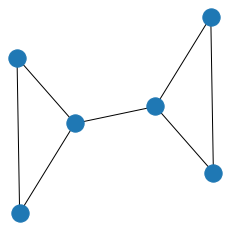

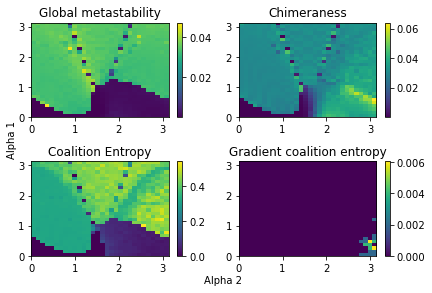

In [5]:
folder = './results/'
file = 'two_comms_three_nodes.pkl'
file = open(folder + file,'rb')
Gsc, results = pickle.load(file)
plt.figure(figsize=(3,3));nx.draw(Gsc.graph)

edge_community_assignment=np.array(list(nx.get_edge_attributes(Gsc.graph,'edge_com').values()))

gms,chi,ce,ceg = shanahan_metrics(results)
plot_measures(gms,chi,ce,ceg)

# without faces 

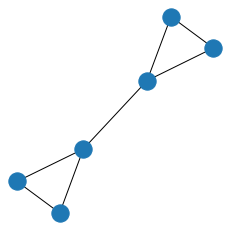

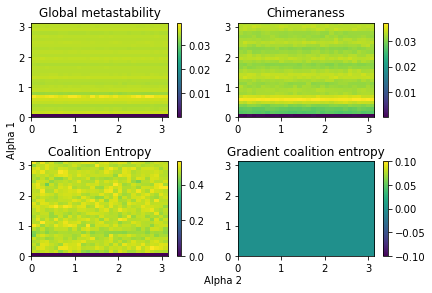

In [10]:
folder = './results/'
file = 'two_comms_three_nodes_nofaces.pkl'
file = open(folder + file,'rb')
Gsc, results = pickle.load(file)
plt.figure(figsize=(3,3));nx.draw(Gsc.graph)

edge_community_assignment=np.array(list(nx.get_edge_attributes(Gsc.graph,'edge_com').values()))

gms,chi,ce,ceg = shanahan_metrics(results)
plot_measures(gms,chi,ce,ceg)

# 2 communities of 4 nodes

# with faces

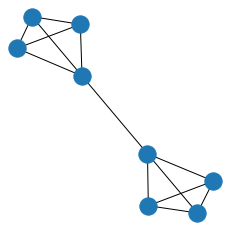

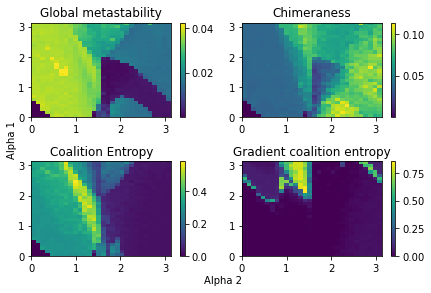

In [11]:
folder = './results/'
file = 'two_comms_four_nodes.pkl'
file = open(folder + file,'rb')
Gsc, results = pickle.load(file)
plt.figure(figsize=(3,3));nx.draw(Gsc.graph)

edge_community_assignment=np.array(list(nx.get_edge_attributes(Gsc.graph,'edge_com').values()))

gms,chi,ce,ceg = shanahan_metrics(results)
plot_measures(gms,chi,ce,ceg)

## without faces 

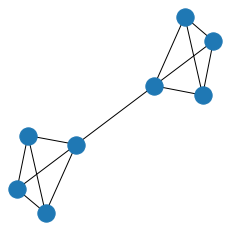

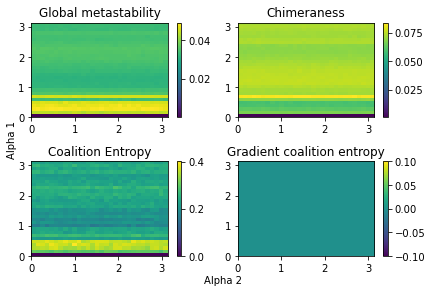

In [12]:
folder = './results/'
file = 'two_comms_four_nodes_nofaces.pkl'
file = open(folder + file,'rb')
Gsc, results = pickle.load(file)
plt.figure(figsize=(3,3));nx.draw(Gsc.graph)

edge_community_assignment=np.array(list(nx.get_edge_attributes(Gsc.graph,'edge_com').values()))

gms,chi,ce,ceg = shanahan_metrics(results)
plot_measures(gms,chi,ce,ceg)

# modular graphs

## increasing the number of intra community edges between two communities

In [54]:
folder = './results/'
file = 'modular_chimera_scan.pkl'
file = open(folder + file,'rb')
results_dict, results_dict_nofaces = pickle.load(file)

alpha1 = np.linspace(0,np.pi,30)
alpha2 = [0]

Nn = 5
Nie = int(Nn*(Nn-1)/2)
inter_edges = np.linspace(1,Nie,Nie,dtype=np.int64)

n_inits = 10
n_repeats = 5


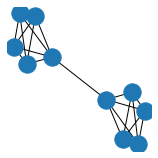

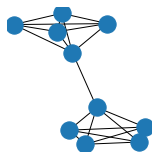

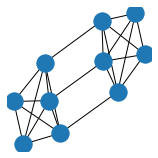

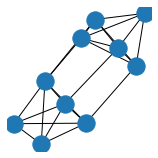

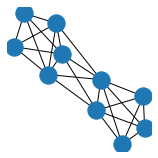

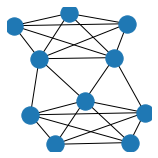

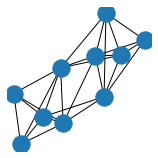

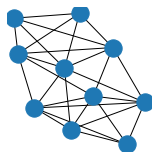

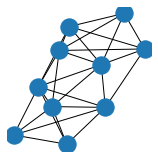

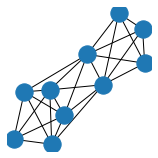

In [102]:
for i,n_edges in enumerate(inter_edges):
    Gsc = results_dict[n_edges][4][0]
    plt.figure(figsize=(2,2))
    nx.draw(Gsc.graph)
    

In [95]:

gms_matrix = np.zeros((inter_edges.shape[0],alpha1.shape[0]))
chi_matrix = np.zeros((inter_edges.shape[0],alpha1.shape[0]))
ce_matrix = np.zeros((inter_edges.shape[0],alpha1.shape[0]))
ceg_matrix = np.zeros((inter_edges.shape[0],alpha1.shape[0]))


for i,n_edges in enumerate(inter_edges):
    
    gms_ = []
    chi_ = []
    ce_ = []
    ceg_ = []
    
    for init in range(n_inits):
        
        Gsc = results_dict[n_edges][init][0]
        edge_community_assignment = np.array(list(nx.get_edge_attributes(Gsc.graph,'community').values()))
        
        for j,a2 in enumerate(alpha1):
            
            gms_ = []
            chi_ = []
            ce_ = []
            ceg_ = []
            
            for r in range(n_repeats):
                y = results_dict[n_edges][init][1][j][r].y
                op=module_order_parameter(y,edge_community_assignment)

                gms, chi = Shanahan_indices(op)
                gms_.append(gms)
                chi_.append(chi)            

                ce_.append(coalition_entropy(op))

                gop, phase_gradient = module_gradient_parameter(y, edge_community_assignment)            
                ceg_.append(coalition_entropy(gop))    
            
        
        
        
            gms_matrix[i,j] += np.mean(gms_)   
            chi_matrix[i,j] += np.mean(chi_)    
            ce_matrix[i,j] += np.mean(ce_)    
            ceg_matrix[i,j] += np.mean(ceg_)    


gms = gms_matrix/n_inits 
chi = chi_matrix/n_inits        
ce = ce_matrix/n_inits        
ceg = ceg_matrix/n_inits        

Text(0.0, 0.5, 'Alpha 1')

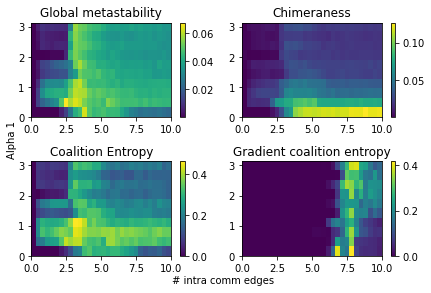

In [98]:
fig, axs = plt.subplots(2, 2)
extents = [0,Nie,0,np.pi]

cm=axs[0,0].imshow(np.flip(gms,axis=0),aspect='auto',extent=extents);
axs[0,0].set_title('Global metastability');
plt.colorbar(cm,ax=axs[0,0])

cm=axs[0,1].imshow(np.flip(chi,axis=0),aspect='auto',extent=extents);
axs[0,1].set_title('Chimeraness');
plt.colorbar(cm,ax=axs[0,1])

cm=axs[1,0].imshow(np.flip(ce,axis=0),aspect='auto',extent=extents);
axs[1,0].set_title('Coalition Entropy');
plt.colorbar(cm,ax=axs[1,0])

cm=axs[1,1].imshow(np.flip(ceg,axis=0),aspect='auto',extent=extents);
axs[1,1].set_title('Gradient coalition entropy');
plt.colorbar(cm,ax=axs[1,1])
    
fig.tight_layout()
    
fig.text(0.5, 0.0, '# intra comm edges', ha='center')
fig.text(0.0, 0.5, 'Alpha 1', va='center', rotation='vertical')